In [ ]:
import numpy as np
from model import GRUD

In [ ]:
# install library to use physionet 2012 data which is processed
!pip install benchpots

In [1]:
from benchpots.datasets import preprocess_physionet2012
# use set-a data which were used in paper
data = preprocess_physionet2012('set-a', rate=0)

2024-10-18 17:07:21 [INFO]: You're using dataset physionet_2012, please cite it properly in your work. You can find its reference information at the below link: 
https://github.com/WenjieDu/TSDB/tree/main/dataset_profiles/physionet_2012
2024-10-18 17:07:21 [INFO]: Dataset physionet_2012 has already been downloaded. Processing directly...
2024-10-18 17:07:21 [INFO]: Dataset physionet_2012 has already been cached. Loading from cache directly...
2024-10-18 17:07:21 [INFO]: Loaded successfully!
2024-10-18 17:07:26 [WARNING]: rate is 0, no missing values are artificially added.
2024-10-18 17:07:26 [INFO]: Total sample number: 3997
2024-10-18 17:07:26 [INFO]: Training set size: 2557 (63.97%)
2024-10-18 17:07:26 [INFO]: Validation set size: 640 (16.01%)
2024-10-18 17:07:26 [INFO]: Test set size: 800 (20.02%)
2024-10-18 17:07:26 [INFO]: Number of steps: 48
2024-10-18 17:07:26 [INFO]: Number of features: 37
2024-10-18 17:07:26 [INFO]: Train set missing rate: 79.73%
2024-10-18 17:07:26 [INFO]: V

In [6]:
train_dataloader = {'X': data['train_X'], 'y': data['train_y']}
val_dataloader = {'X': data['val_X'], 'y': data['val_y']}
test_dataloader = {'X': data['test_X'], 'y': data['test_y']}

In [ ]:
# cannot know which features were used in paper, thus, used all features. 

In [9]:
# use model defined from py file
model = GRUD(n_steps=48, n_features=37, n_classes=2, rnn_hidden_size=32, batch_size=64, epochs=10000, patience=20, device='cuda')
model.fit(train_dataloader, val_dataloader)  # train the model on the dataset
pred = model.predict(test_dataloader)

2024-10-18 17:11:33 [INFO]: Using the given device: cuda
2024-10-18 17:11:33 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.
2024-10-18 17:11:33 [INFO]: GRUD initialized with the given hyperparameters, the number of trainable parameters: 16,128
2024-10-18 17:11:38 [INFO]: Epoch 001 - training loss: 0.4694, validation loss: 0.3712
2024-10-18 17:11:41 [INFO]: Epoch 002 - training loss: 0.3406, validation loss: 0.3492
2024-10-18 17:11:44 [INFO]: Epoch 003 - training loss: 0.3155, validation loss: 0.3411
2024-10-18 17:11:47 [INFO]: Epoch 004 - training loss: 0.2985, validation loss: 0.3356
2024-10-18 17:11:49 [INFO]: Epoch 005 - training loss: 0.2886, validation loss: 0.3288
2024-10-18 17:11:52 [INFO]: Epoch 006 - training loss: 0.2756, validation loss: 0.3283
2024-10-18 17:11:54 [INFO]: Epoch 007 - training loss: 0.2634, validation loss: 0.3344
2024-10-18 17:11:57 [INFO]: Epoch 008 - training loss: 0.2570, validation loss: 0.3258
2024-10-18 17:12:0

In [14]:
cls = model.classify(test_dataloader)

In [15]:
cls

array([[9.9998868e-01, 1.1331392e-05],
       [9.9630177e-01, 3.6982007e-03],
       [9.8183882e-01, 1.8161235e-02],
       ...,
       [9.3461430e-01, 6.5385684e-02],
       [9.9677855e-01, 3.2214369e-03],
       [8.7104893e-01, 1.2895110e-01]], dtype=float32)

In [20]:
# get roc_auc_score
from sklearn.metrics import roc_auc_score
display(roc_auc_score(data['test_y'], cls[:, 1]))

0.7969377214660233

The loaded data has label about mortality. And in the paper with mortality task, its roc_auc_score were like below. It was about 0.825. 

And code reproducing resulted in 0.7969 which is slightly lower than 0.825, but their difference is not that huge.

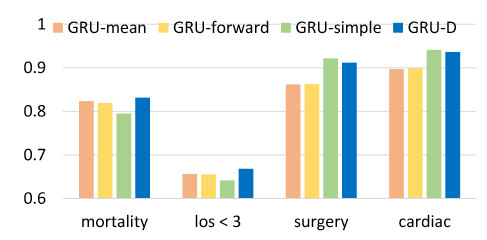